# Using pre-defined networks in pandapower

Besides creating your own grids using pandapower functions, pandapower provides synthetic and benchmark grids through the networks module.

The pandapower networks module contains example grids, simple test grids, randomly generated grids, CIGRE test grids, IEEE case files and synthetic low voltage grids.

In [922]:
import pandapower as pp
import pandapower.networks as nw
import pandas as pd

#Import an example network (IEEE 9 buses)
net = nw.case9()

# Inspecting information about a network
## Direct inspection

We'll first inspect, general information about the network and the specific information about buses and lines

In [923]:
net

This pandapower network includes the following parameter tables:
   - bus (9 elements)
   - load (3 elements)
   - gen (2 elements)
   - ext_grid (1 element)
   - line (9 elements)
   - poly_cost (3 elements)
   - bus_geodata (9 elements)

In [924]:
net.bus # show bus table

,in_service,max_vm_pu,min_vm_pu,name,type,vn_kv,zone
0,True,1.1,0.9,1,b,345.0,1
1,True,1.1,0.9,2,b,345.0,1
2,True,1.1,0.9,3,b,345.0,1
3,True,1.1,0.9,4,b,345.0,1
4,True,1.1,0.9,5,b,345.0,1
5,True,1.1,0.9,6,b,345.0,1
6,True,1.1,0.9,7,b,345.0,1
7,True,1.1,0.9,8,b,345.0,1
8,True,1.1,0.9,9,b,345.0,1


In [925]:
net.line # show line table

,c_nf_per_km,df,from_bus,g_us_per_km,in_service,length_km,max_i_ka,max_loading_percent,name,parallel,r_ohm_per_km,std_type,to_bus,type,x_ohm_per_km
0,0.000000,1.0,0,0.0,True,1.0,0.418370,100.0,None,1,0.000000,None,3,ol,68.558400
1,352.117636,1.0,3,0.0,True,1.0,0.418370,100.0,None,1,20.234250,None,4,ol,109.503000
2,797.836164,1.0,4,0.0,True,1.0,0.251022,100.0,None,1,46.419750,None,5,ol,202.342500
3,0.000000,1.0,2,0.0,True,1.0,0.502044,100.0,None,1,0.000000,None,5,ol,69.748650
4,465.775861,1.0,5,0.0,True,1.0,0.251022,100.0,None,1,14.163975,None,6,ol,119.977200
5,332.060303,1.0,6,0.0,True,1.0,0.418370,100.0,None,1,10.117125,None,7,ol,85.698000
6,0.000000,1.0,7,0.0,True,1.0,0.418370,100.0,None,1,0.000000,None,1,ol,74.390625
7,681.949347,1.0,7,0.0,True,1.0,0.418370,100.0,None,1,38.088000,None,8,ol,191.630250
8,392.232304,1.0,8,0.0,True,1.0,0.418370,100.0,None,1,11.902500,None,3,ol,101.171250


## Accessing and Setting Parameters with pandas

All data in pandapower is stored in pandas dataframes, which is why all functionalities that are implemented in pandas (http://pandas.pydata.org/) can be used with pandapower. pandas is a very powerful and widely used tool for data analysis. You can accesss all parameters of one element with the .loc command:

In [926]:
#Detailed information about line 4
net.line.loc[4]

c_nf_per_km             465.776
df                            1
from_bus                      5
g_us_per_km                   0
in_service                 True
length_km                     1
max_i_ka               0.251022
max_loading_percent         100
name                       None
parallel                      1
r_ohm_per_km             14.164
std_type                   None
to_bus                        6
type                         ol
x_ohm_per_km            119.977
Name: 4, dtype: object

Multiple parameters of multiple elements are returned as a pandas dataframe:

In [927]:
#Length and type information about line 3 and 4                               
net.line.loc[[3,4], ["length_km", "r_ohm_per_km", "x_ohm_per_km", "c_nf_per_km"]]

,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km
3,1.0,0.000000,69.74865,0.000000
4,1.0,14.163975,119.97720,465.775861


Querying Dataframes: If you need to select elements with specific characteristics, you can doso with boolean masks. For example, if you want to select all lines with rated current less than 0.4 kA:

In [928]:
light_duty_lines = net.line[net.line.max_i_ka < 0.4]
#Output
light_duty_lines[["from_bus", "to_bus", "r_ohm_per_km", "x_ohm_per_km"]]

,from_bus,to_bus,r_ohm_per_km,x_ohm_per_km
2,4,5,46.419750,202.3425
4,5,6,14.163975,119.9772


For more information about data handling, see this tutorial: https://github.com/e2nIEE/pandapower/blob/master/tutorials/data_analysis.ipynb

# Plotting a network

Buses in pandapower can be optionally defined with x/y geo co-ordinates, see documentation: https://pandapower.readthedocs.io/en/develop/elements/bus.html
<br>Same applies for lines

In [929]:
net.bus_geodata

,x,y,coords
0,-2.913407,-0.643875,None
1,0.936991,-0.117367,None
2,-1.451821,2.940568,None
3,-2.054941,0.009793,None
4,-2.178906,1.148920,None
5,-1.294398,1.871889,None
6,-0.243500,1.416604,None
7,-0.063903,0.285821,None
8,-0.983023,-0.394095,None


Pandapower uses matplotlib to plot buses and lines in the network. The plotting module provides several functions that create collections from pandapower networks.

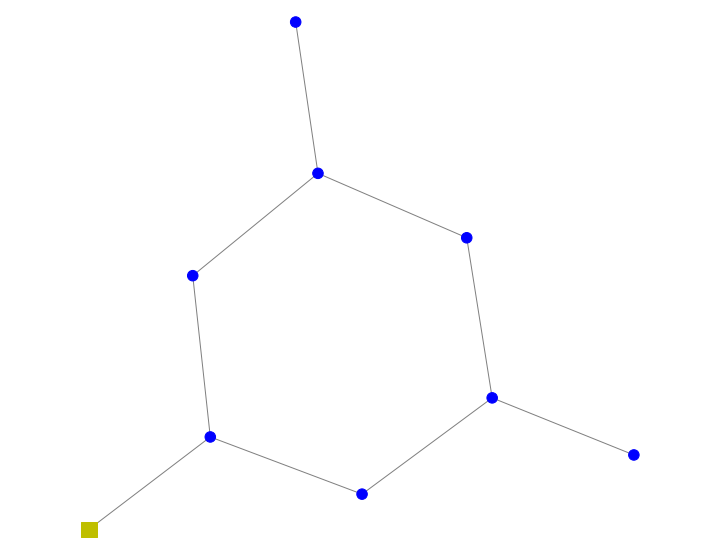

<AxesSubplot:>

In [930]:
import pandapower.plotting as plot
# simple plot of net with existing geocoordinates
plot.simple_plot(net, show_plot=True)

For more information visit the basic plotting tutorial: https://github.com/e2nIEE/pandapower/blob/master/tutorials/plotting_basic.ipynb

# Running power flow

Runing a loadflow adds seperate result table with the prefix 'res_':

In [931]:
pp.runpp(net)
net

This pandapower network includes the following parameter tables:
   - bus (9 elements)
   - load (3 elements)
   - gen (2 elements)
   - ext_grid (1 element)
   - line (9 elements)
   - poly_cost (3 elements)
   - bus_geodata (9 elements)
 and the following results tables:
   - res_bus (9 elements)
   - res_line (9 elements)
   - res_ext_grid (1 element)
   - res_load (3 elements)
   - res_gen (2 elements)

After running a power flow the results are written in the results tables of the elements (buses, lines etc.) and can be processed using the panda functions as discussed above. Visit the power flow tutorial for more insight: https://github.com/e2nIEE/pandapower/blob/master/tutorials/powerflow.ipynb

## Power Flow Performance

Pandapower does not have its own power flow algorithm, but rather uses pypower, a python version of Matpower, in the background. When a power flow is run, pandapower combines the information of all element tables into one pypower case file and uses pypower to run the power flow. The results are then processed and written back into pandapower.

The first time a pypower case is created requires a lot of time, but after that changing individual parameters and running the power flow is much faster. Use the following code snipset to calculate the time needed.

In [932]:
import time
start_time = time.time()
pp.runpp(net)
print("Elapsed time: {:2.4f} ms".format(1000*(time.time() - start_time)))

Elapsed time: 14.9598 ms


Now take line 5 of service (in_service=False) and repeat the calculation.

Investigate how the different options for the power flow perform in terms of time:
* DC power flow
* Gauss-Seidel
* Newton-Raphson (default)
* fast decoupled NR

If you have experience with python, try to plot the execution time over the required convergence threshold (vary the tolerance_mva between 1.e-5 and 1.e-9). Is there any dependency? For which algorithm?

## Performance analysis for larger networks

Now use following larger networks to analyze the performance of the different power flow algorithms:
* case_ieee30()
* case118()
* case300() - do not use gs
* case3120sp() - do not use gs
How does the performance scale with network size?